# INFO 2950: Phase 4

## Part 3: Preregistration Statements

### Preregistration 1: How does GDP have an impact on the completed tertiary education rates among the age groups 25-34?

- $H_0$: GDP has a greater impact on completed tertiary education rates among the age group 25-34 compared to other factors in our model.
- $H_A$: GDP has no impact on completed tertiary education rates among the age group 25-34 compared to the other factors in our model.

### Preregistration 2: How does government spending on education impact the completed tertiary education rates among the age groups 25-34?

- $H_0$: The rate of completed higher education stays the same with higher government spending on education.
- $H_A$: The rate of completed higher education increases with higher government spending on education.


For both these models, we will accept a p-value (indicating the probability of our observed data given that our null hypothesis is true) that is less than 0.05 from our linear regression.


## Part 4: Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb 
import missingno as msno 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import statsmodels.api as sm

In [2]:
combined_df = pd.read_csv("combined_data.csv")

### Preregistration Question 2:



<Axes: >

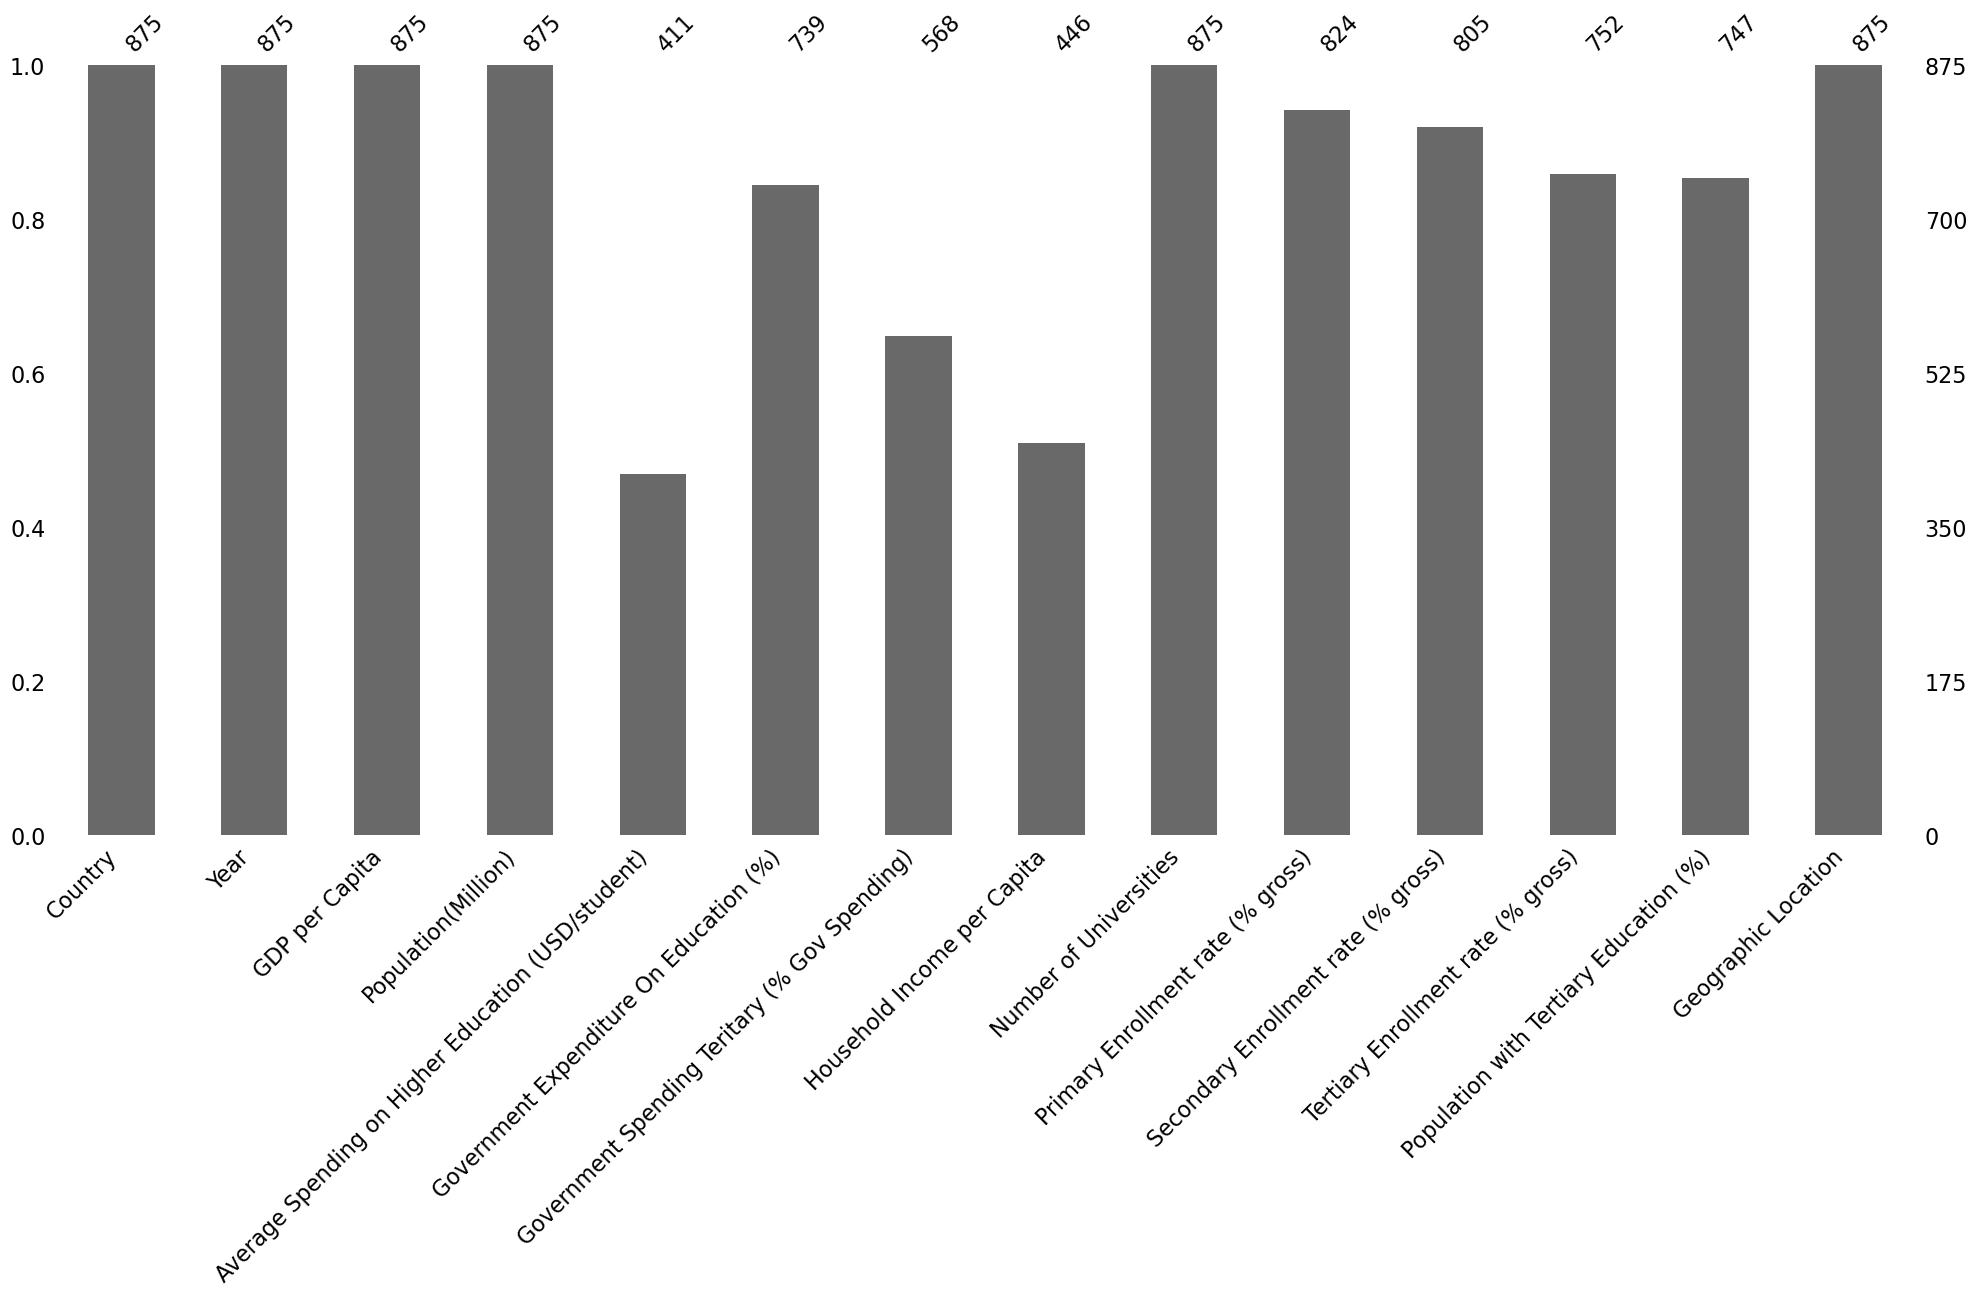

In [16]:
msno.bar(combined_df)

From this bar graph, we can see how many missing values are there in each column. For example, 950 rows is the maxiumum amount of information in each column. However, in columns like average spending on higher education (USD/Student) and Household income per capita, we can see how they are missing a lot of data; almost half of the data values are missing in these 2 data columns. Because of this, and in order to analyze our preregistration question 2, we need to figure out a way to fix this. The first method is to aggregate the data by country and fill in the missing values by the column's average for each country. The second method is to drop all the rows with missing values. Using these 2 methods, we will construct a scatterplot and analyze the differences. 

In [17]:
#Method 1: 
aggregate_df = combined_df.copy()

#all the columns that have nans
nan_col = combined_df.columns[combined_df.isnull().any()].tolist()

#fill in the columns with nans with the mean of each column for each country
aggregate_df[nan_col] = combined_df.groupby('Country')[nan_col].transform(lambda group: group.fillna(group.mean()))
aggregate_df.to_csv('nan_filled.csv', index=False)

#Method 2: dropping rows with Nan's

# Creating a new dataframe with only the Government Expenditures and Population with Tertiary Education values 
# and dropping the Nans
query = """
        SELECT "Government Expenditure On Education (%)", "Population with Tertiary Education (%)"
        FROM combined_df;
        """
gov_tert_dropped_nan_df = duckdb.sql(query).df()
gov_tert_dropped_nan_df.dropna(inplace = True)

# Dropping Nan's from the whole dataframe
dropped_nan_df = combined_df.dropna(inplace = False)
dropped_nan_df.to_csv('dropped_nan.csv', index=False)


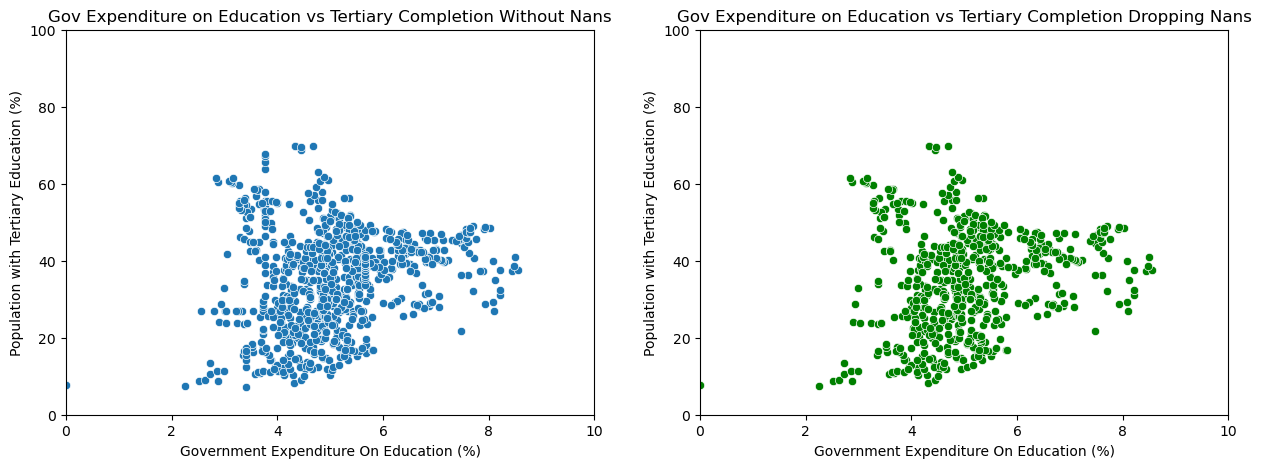

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting aggregate_df
sns.scatterplot(data=aggregate_df, x="Government Expenditure On Education (%)",
                           y="Population with Tertiary Education (%)", marker="o", ax=axes[0]) 
#axes[0].legend(title="Year", loc='upper right')
axes[0].set_title("Gov Expenditure on Education vs Tertiary Completion Without Nans")
axes[0].set_xlim(0, 10)
axes[0].set_ylim(0,100)

#Plotting gov_tert_dropped_nan_df
sns.scatterplot(data=gov_tert_dropped_nan_df, x="Government Expenditure On Education (%)",
                           y="Population with Tertiary Education (%)", marker="o", ax=axes[1], color = "green")
#axes[1].legend(title="Year", loc='upper right')
axes[1].set_title("Gov Expenditure on Education vs Tertiary Completion Dropping Nans")
axes[1].set_xlim(0, 10)
axes[1].set_ylim(0,100)

plt.show()

Both these graphs shows the relationship between the government expenditure on education as a percentage of total governmemtexpenditures and the percentage of people who have completed tertiary education within the age group of 25-34.

The only difference between these two graphs is that one graph (the blue graph) plots all the data with and without nans. In order to plot this data, we had to clean the data. We replaced all the missing data values with the mean of the column for that country in order to still preserve the maxiumum amount of data/information that we have. For the second graph (the green graph), we made a new dataframe with only the two variables that we are plotting, and dropping all the rows with Nans. Instead of using the full data frame with all the dropped values, we used the smaller data frame with dropped Nans in order to maximize the amount of data plotted. Otherwise, we would loose a lot of data. By doing this, we can ensure that all the values are different. For the other method, there might be points where the data is exactly the same/duplicated.

Both of these grahs don't have an obvious trend. All the points in the graphs are scattered and there is no clear, negative or positive trend. However, the plot with the data frame with filled means looks very similar to the graph with the dropped rows of nans. This might indicate these 2 variables, 'Government Expenditure On Education (%)' and 'Population with Tertiary Education (%)', have no linear correlation. Because of this, we will try to transform the y-variable (Population with Tertiary Education (%)) in order to find a relationship between the 2 variables.

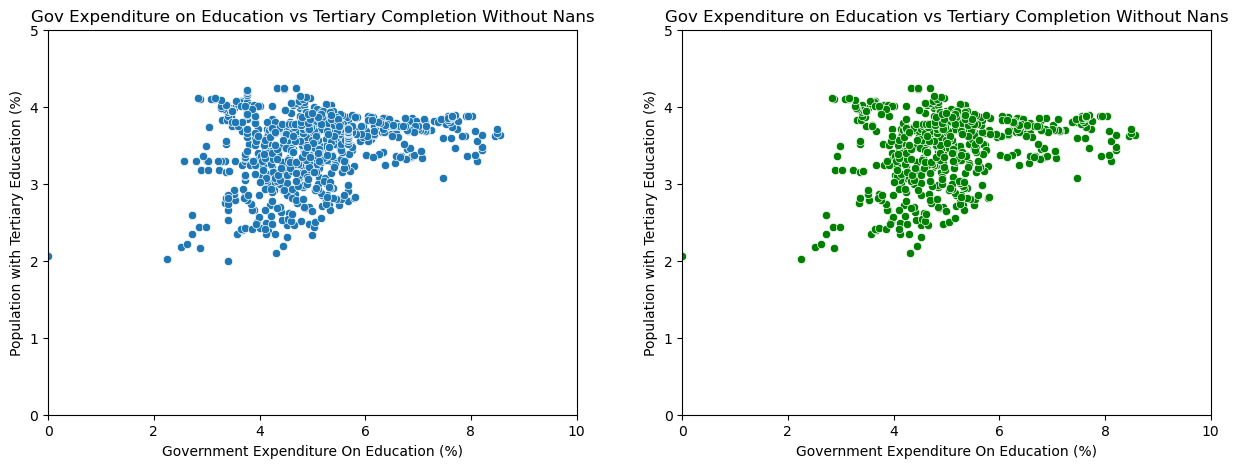

In [19]:
#Transforming the variable Population with Tertiary Education (%) by a log transformation.
log_fig, log_axes = plt.subplots(1, 2, figsize=(15, 5))

#Plotting aggregate_df
log_y = np.log(aggregate_df['Population with Tertiary Education (%)'])

sns.scatterplot(x = aggregate_df['Government Expenditure On Education (%)'], y = log_y, marker = "o", 
                ax = log_axes[0])
log_axes[0].set_title("Gov Expenditure on Education vs Tertiary Completion Without Nans")
log_axes[0].set_xlim(0, 10)
log_axes[0].set_ylim(0,5)

#Plotting gov_tert_dropped_nan_df
log_y2 = np.log(gov_tert_dropped_nan_df['Population with Tertiary Education (%)'])
sns.scatterplot(x = gov_tert_dropped_nan_df['Government Expenditure On Education (%)'], y = log_y, marker = "o", 
                ax = log_axes[1], color = "green")
log_axes[1].set_title("Gov Expenditure on Education vs Tertiary Completion Without Nans")
log_axes[1].set_xlim(0, 10)
log_axes[1].set_ylim(0,5)

plt.show()

Once again, I plotted the relationship between the government expenditure on education as a percentage of total governmemt expenditures and the percentage of people who have completed tertiary education within the age group of 25-34. However, this time, I did the log transformation of the y-values of both data sets in order to figure out whether there some sort of relationship or not since the graphs above showed no linear relationship. 

We chose to transform the y-value only because there is a larger range of values for the y-values, while the x-values only have a range less than 10. However, this made no difference in our evaluation between the relationship between the government expenditure on education as a percentage of total governmemt expenditures and the percentage of people who have completed tertiary education within the age group of 25-34 because these graphs also do not indicate a relationship between the variables. 


####However, we will still use this model for the hypothesis test.
####Because of this, we will use the non-transformed variables for our hypothesis test.

In [20]:
#aggregate_df Linear Model Hypothesis Test

X = aggregate_df[['Government Expenditure On Education (%)']].values
#y = aggregate_df['Population with Tertiary Education (%)'].values

y = log_y.values

model = LinearRegression().fit(X,y)

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     63.59
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           4.78e-15
Time:                        17:48:07   Log-Likelihood:                -447.58
No. Observations:                 875   AIC:                             899.2
Df Residuals:                     873   BIC:                             908.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0010      0.062     48.273      0.0

In [21]:
#gov_tert_dropped_nan_df Linear Model Hypothesis Test

X = gov_tert_dropped_nan_df[['Government Expenditure On Education (%)']].values
#y = gov_tert_dropped_nan_df['Population with Tertiary Education (%)'].values

y = log_y2

model = LinearRegression().fit(X,y)

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Population with Tertiary Education (%)   R-squared:                       0.067
Model:                                                OLS   Adj. R-squared:                  0.066
Method:                                     Least Squares   F-statistic:                     45.87
Date:                                    Wed, 15 Nov 2023   Prob (F-statistic):           2.87e-11
Time:                                            17:48:07   Log-Likelihood:                -355.31
No. Observations:                                     641   AIC:                             714.6
Df Residuals:                                         639   BIC:                             723.5
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

The AIC helps to  evaluate how well a model fits the data it was generated from. Based on the OLS regression results of both the aggregate_df and gov_tert_dropped_nan_df, the AIC value for the gov_tert_dropped_nan_df linear model is significantly lower than the aggregate_df linear model. Because the lower AIC value indicates a better model, we conducted our hypothesis testing on the gov_tert_dropped_nan_df model. 

(delete this or above)
The AIC helps to  evaluate how well a model fits the data it was generated from. Based on the OLS regression results of both the aggregate_df and gov_tert_dropped_nan_df, the AIC value for the gov_tert_dropped_nan_df linear model is significantly higher than the aggregate_df linear model. Because the lower AIC value indicates a better model, we conducted our hypothesis testing on the aggregate_df model. 


The p-value is 0.000 < 0.05. This means the p-value is significant and we reject the null hypothesis that the rate of completed higher education stays the same with higher government spending on education and the alternative hypothesis which states that the rate of completed higher education increases with higher government spending on education is accepted.



